In [90]:
## Source the files in the "functions" folder
files <- dir("functions",full.names=TRUE)
for(i in 1:length(files)) source(files[i])

### read & plot


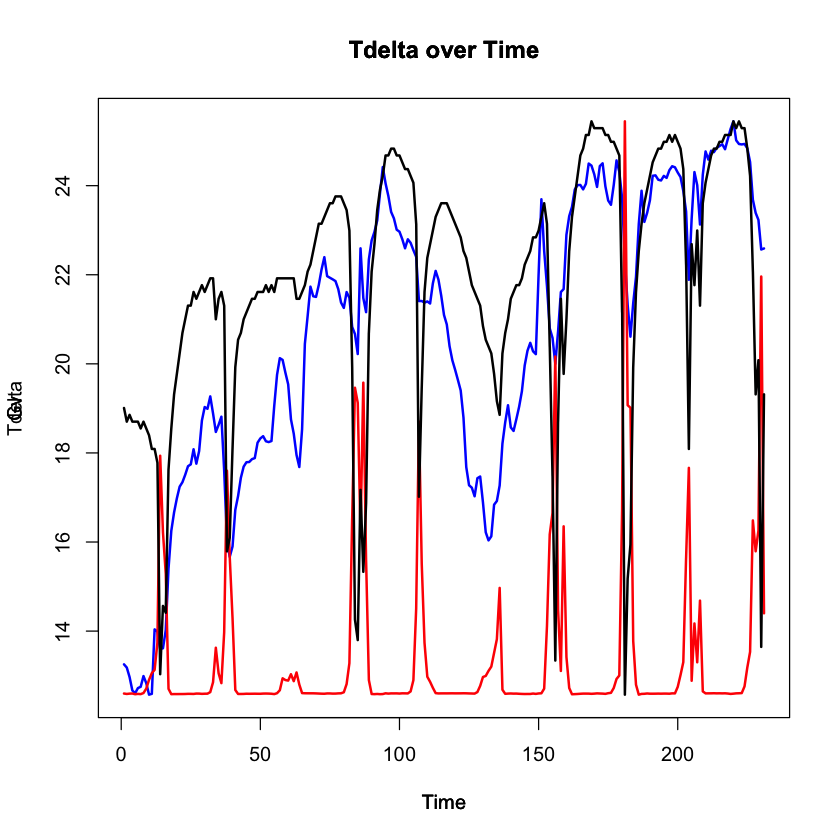

In [91]:
D <- read.csv("box_data_60min.csv", header = TRUE)
D$thour <- D$thour-D$thour[1]+1

par(bg = 'white')
plot(D$thour,D$Tdelta, type = "l", col = "blue", lwd = 2, xlab = "Time", ylab = "Tdelta", main = "Tdelta over Time")
# plot on the same graph secondary y-axis
par(new = TRUE)
plot(D$thour,D$Gv, type = "l", col = "red", lwd = 2, xlab = "Time", ylab = "Gv", main = "Tdelta over Time", axes = FALSE)
# third y axis
par(new = TRUE)
plot(D$thour,D$Ph, type = "l", col = "black", lwd = 2, xlab = "Time", ylab = "Gv", main = "Tdelta over Time", axes = FALSE)

2. Split the data into a train and test set, such that ”2013-02-06 00:00” is the last data point in the
training set (i.e. thour = 1, ..., 167 is the training set). From now on, work only on the training
set, except where explicitly told to use the test set.

In [92]:
## Divide intro train and test set
teststart <- 167
Dtrain <- D[D$thour < teststart, ]
Dtest <- D[D$thour >= teststart, ]

# show first 10 rows of the training set
head(Dtrain, 5)


,thour,tdate,Ph,Tdelta,Gv,Ph.l0,Ph.l1,Ph.l2,Ph.l3,Ph.l4,...,Gv.l1,Gv.l2,Gv.l3,Gv.l4,Gv.l5,Gv.l6,Gv.l7,Gv.l8,Gv.l9,Gv.l10
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2013-01-30 02:00:00,56,13.25358,-0.4986434,56,55,57,57,58,...,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765,-0.1427003,8.2623385,20.4754845
2,2,2013-01-30 03:00:00,54,13.18146,-1.1270349,54,56,55,57,57,...,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765,-0.1427003,8.2623385
3,3,2013-01-30 04:00:00,55,12.96879,-0.6432978,55,54,56,55,57,...,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765,-0.1427003
4,4,2013-01-30 05:00:00,54,12.66775,-0.4560078,54,55,54,56,55,...,-0.6432978,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765
5,5,2013-01-30 06:00:00,54,12.60525,-1.5340601,54,54,55,54,56,...,-0.4560078,-0.6432978,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668


3. Investigate the variables and their relations: e.g. with scatter, auto-correlation and cross-correlation
plots. Most focus on Ph. Highlight key aspects of the dynamics and interrelationships among
the variables. What can be seen directly and what canno

quartz_off_screen 
                3

pdf 
  2

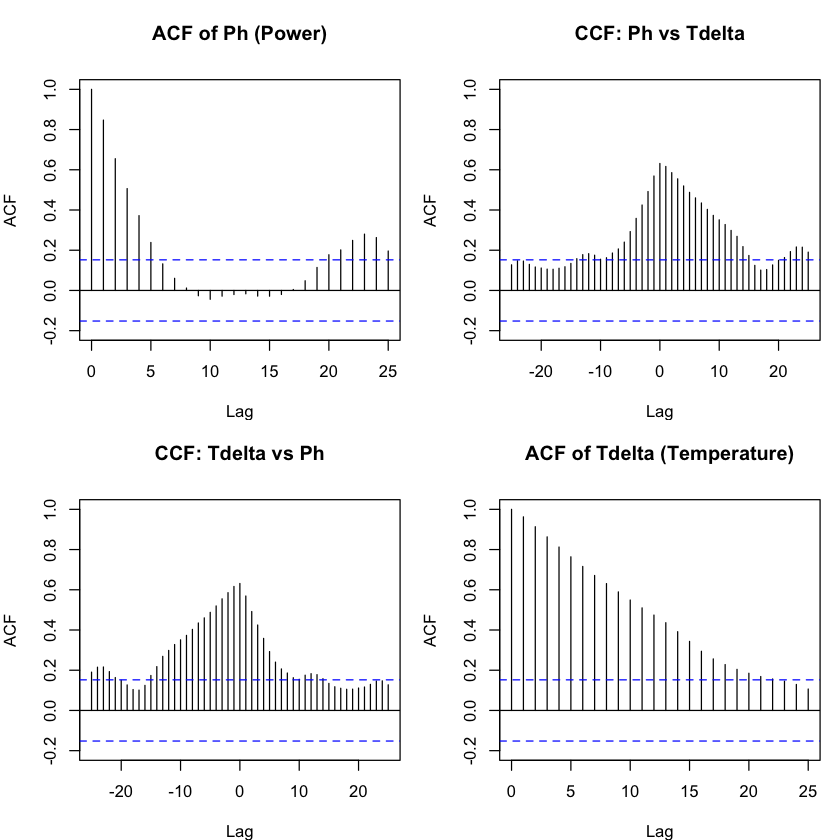

quartz_off_screen 
                3

pdf 
  2

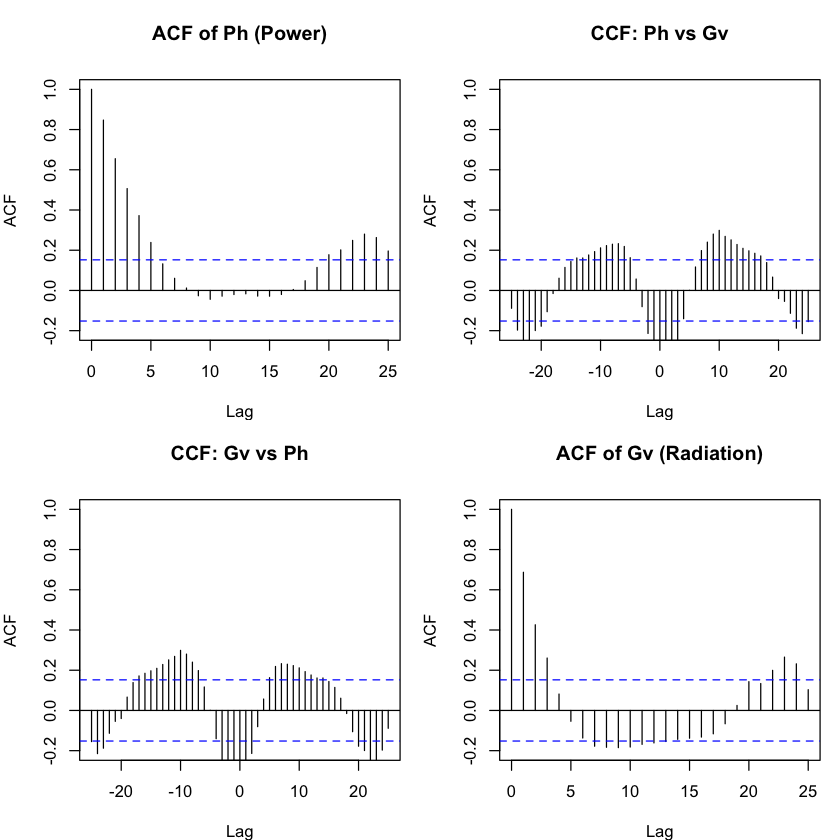

In [67]:
# Plot with 2*2 subplots with headlines for each subplot
par(mfrow=c(2,2), mar=c(4,4,4,1), bg = 'white') 

acf(Dtrain$Ph, main = "ACF of Ph (Power)", lag.max = 25, ylim = c(-0.2, 1))

ccf(Dtrain$Ph, Dtrain$Tdelta, lag.max = 25, ylim = c(-0.2, 1), main = "CCF: Ph vs Tdelta")

ccf(Dtrain$Tdelta, Dtrain$Ph, lag.max = 25, ylim = c(-0.2, 1), main = "CCF: Tdelta vs Ph")

acf(Dtrain$Tdelta, lag.max = 25, ylim = c(-0.2, 1), main = "ACF of Tdelta (Temperature)")
# save figure
dev.copy(png, file = "acf_ccf_Ph_Tdelta.png", width = 600, height = 600, res = 100)
dev.off()

par(mfrow=c(2,2), mar=c(4,4,4,1), bg = 'white') 

acf(Dtrain$Ph, main = "ACF of Ph (Power)", lag.max = 25, ylim = c(-0.2, 1))

ccf(Dtrain$Ph, Dtrain$Gv, lag.max = 25, ylim = c(-0.2, 1), main = "CCF: Ph vs Gv")

ccf(Dtrain$Gv, Dtrain$Ph, lag.max = 25, ylim = c(-0.2, 1), main = "CCF: Gv vs Ph")

acf(Dtrain$Gv, lag.max = 25, ylim = c(-0.2, 1), main = "ACF of Gv (Radiation)")
# save figure
# bigger text size
dev.copy(png, file = "acf_ccf_Ph_Gv.png", width = 600, height = 600, res = 100)
dev.off()




3.4. Estimate the impulse response from Tdelta and Gv to Ph make it up to lag 10. Present it for both
variables in plots and comment

In [68]:
lag_matrix <- function(x, max_lag) {
  n <- length(x)
  m <- matrix(0, n, max_lag)
  for (i in 1:max_lag) {
    m[(i+1):n, i] <- x[1:(n - i)]
  }
  return(m)
}

head(lag_matrix(Dtrain$Ph, 10),6)
head(Dtrain[6:16], 5)
head(Dtrain[17:27], 5)
head(Dtrain[28:38], 5)

0,0,0,0,0,0,0,0,0,0
56,0,0,0,0,0,0,0,0,0
54,56,0,0,0,0,0,0,0,0
55,54,56,0,0,0,0,0,0,0
54,55,54,56,0,0,0,0,0,0
54,54,55,54,56,0,0,0,0,0


,Ph.l0,Ph.l1,Ph.l2,Ph.l3,Ph.l4,Ph.l5,Ph.l6,Ph.l7,Ph.l8,Ph.l9,Ph.l10
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,56,55,57,57,58,59,59,59,59,59,58
2,54,56,55,57,57,58,59,59,59,59,59
3,55,54,56,55,57,57,58,59,59,59,59
4,54,55,54,56,55,57,57,58,59,59,59
5,54,54,55,54,56,55,57,57,58,59,59


,Tdelta.l0,Tdelta.l1,Tdelta.l2,Tdelta.l3,Tdelta.l4,Tdelta.l5,Tdelta.l6,Tdelta.l7,Tdelta.l8,Tdelta.l9,Tdelta.l10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,14.18900,13.95471,14.30092,14.37683,14.00325
2,13.18146,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,14.18900,13.95471,14.30092,14.37683
3,12.96879,13.18146,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,14.18900,13.95471,14.30092
4,12.66775,12.96879,13.18146,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,14.18900,13.95471
5,12.60525,12.66775,12.96879,13.18146,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,14.18900


,Gv.l0,Gv.l1,Gv.l2,Gv.l3,Gv.l4,Gv.l5,Gv.l6,Gv.l7,Gv.l8,Gv.l9,Gv.l10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765,-0.1427003,8.2623385,20.4754845
2,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765,-0.1427003,8.2623385
3,-0.6432978,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765,-0.1427003
4,-0.4560078,-0.6432978,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765
5,-1.5340601,-0.4560078,-0.6432978,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668


Side 228 i bogen!!

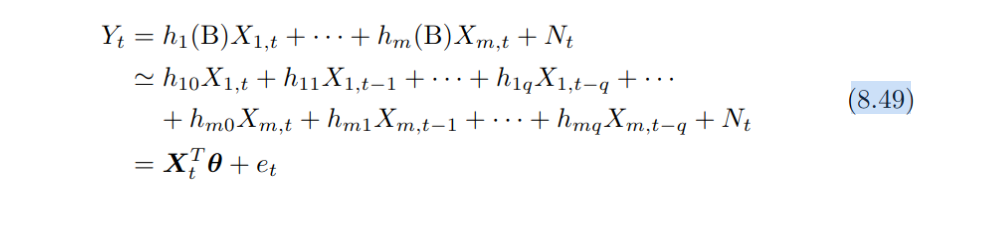
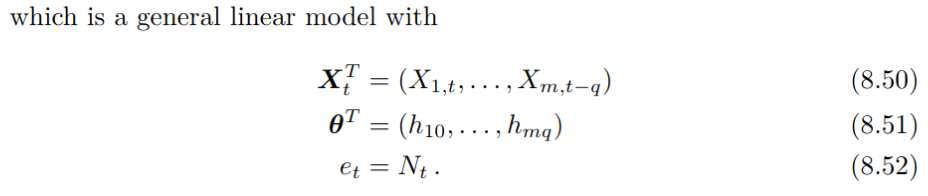

In [69]:
# estimating the impulse response form Tdelta and Gv to Ph using LS
Tdelta_lag10 <- Dtrain[17:27]
Gv_lag10 <- Dtrain[28:38]

x <- as.matrix(cbind(Tdelta_lag10,Gv_lag10))
y <- as.matrix(Dtrain[3])



In [70]:
#print the shape of x
print(dim(Gv_lag10))
print(dim(x))
print(dim(y))
head(x,5)

[1] 166  11
[1] 166  22
[1] 166   1


,Tdelta.l0,Tdelta.l1,Tdelta.l2,Tdelta.l3,Tdelta.l4,Tdelta.l5,Tdelta.l6,Tdelta.l7,Tdelta.l8,Tdelta.l9,...,Gv.l1,Gv.l2,Gv.l3,Gv.l4,Gv.l5,Gv.l6,Gv.l7,Gv.l8,Gv.l9,Gv.l10
1,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,14.18900,13.95471,14.30092,14.37683,...,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765,-0.1427003,8.2623385,20.4754845
2,13.18146,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,14.18900,13.95471,14.30092,...,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765,-0.1427003,8.2623385
3,12.96879,13.18146,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,14.18900,13.95471,...,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765,-0.1427003
4,12.66775,12.96879,13.18146,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,14.18900,...,-0.6432978,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765
5,12.60525,12.66775,12.96879,13.18146,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,...,-0.4560078,-0.6432978,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668


In [71]:
theta <- solve(t(x) %*% x) %*% t(x) %*% y

# Predicted values
y_hat <- x %*% theta

# Compare actual vs predicted for a few rows
data.frame(
  Actual = round(y[1:10], 3),
  Predicted = round(y_hat[1:10], 3),
  Residual = round(y[1:10] - y_hat[1:10], 3)
)

Actual,Predicted,Residual
<dbl>,<dbl>,<dbl>
56,53.357,2.643
54,53.858,0.142
55,54.423,0.577
54,52.930,1.070
54,52.015,1.985
54,51.522,2.478
53,51.626,1.374
54,52.010,1.990
53,51.674,1.326


quartz_off_screen 
                3

pdf 
  2

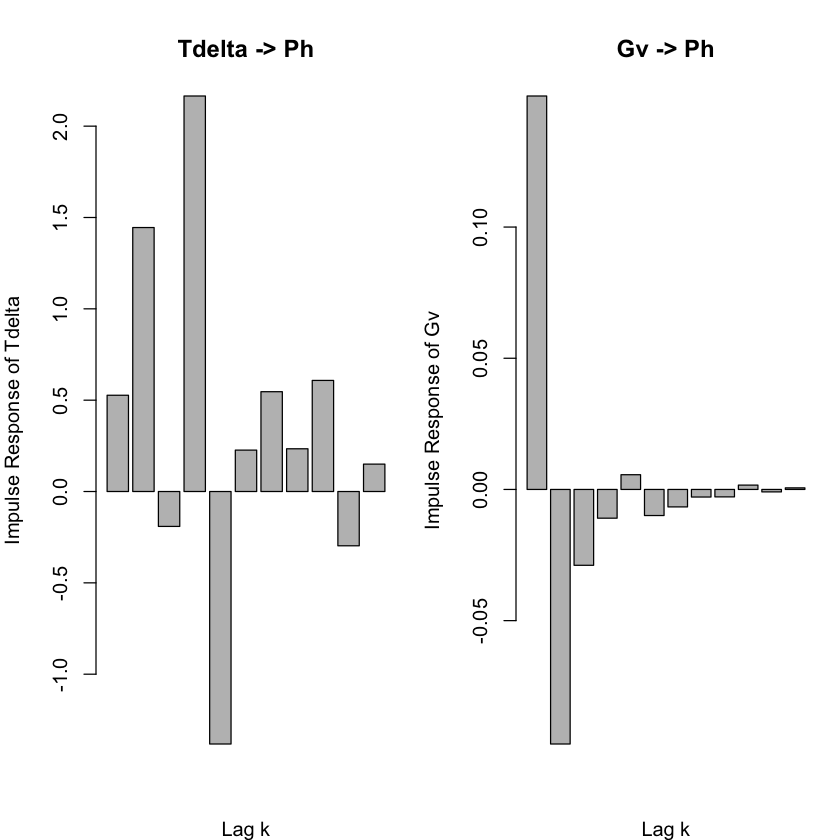

In [72]:
#Plot the impulse responses seperately for Tdelta and Gv
par(mfrow=c(1,2), mar=c(4,4,4,1), bg = 'white')
barplot(theta[0:11],xlab = "Lag k", ylab =  "Impulse Response of Tdelta", main = "Tdelta -> Ph")
barplot(theta[11:22],xlab = "Lag k", ylab = "Impulse Response of Gv", main = "Gv -> Ph")

dev.copy(png, file = "Impulse_response.png", width = 600, height = 600, res = 100)
dev.off()

# 3.5 Fit linear regression model to Ph (power)
#Ph,t = ω1Tdelta,t + ω2Gv,t + εt

section 9.7.1 in book

           [,1]
[1,] 11.3990811
[2,]  3.3211151
[3,] -0.1113063


quartz_off_screen 
                3

pdf 
  2

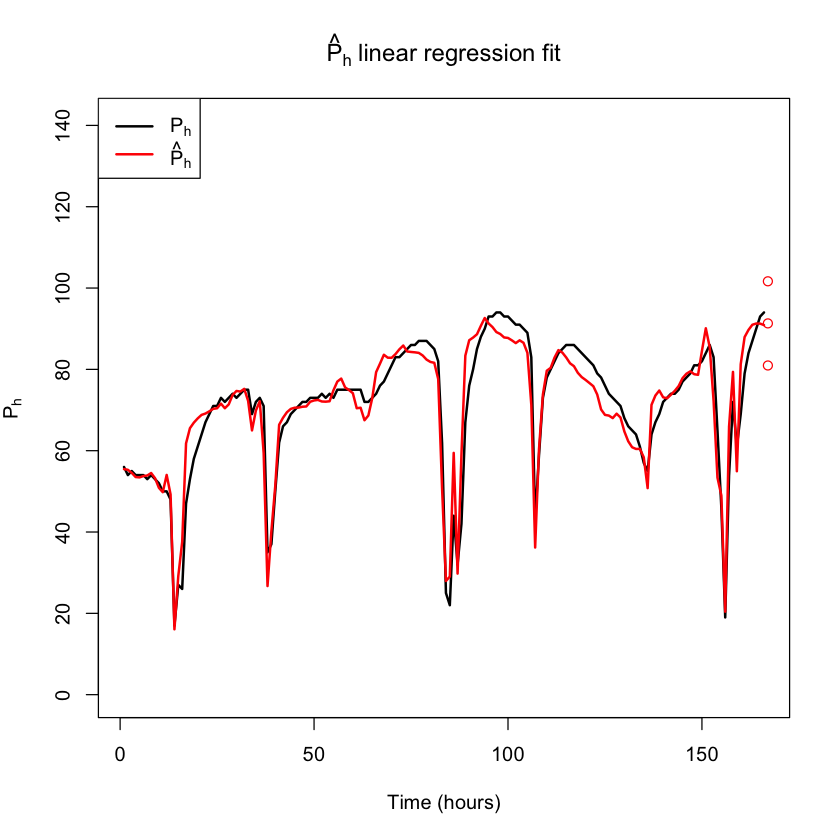

In [73]:
X <- cbind(1, Dtrain$Tdelta, Dtrain$Gv)  # include intercept
Y <- Dtrain$Ph
parameters <- solve(t(X) %*% X) %*% t(X) %*% Y

Y_hat <- X %*% parameters
residuals <- Y - Y_hat

# # plot of residuals
# par(mfrow=c(1,2), mar=c(4,4,4,1), bg = 'white')
# plot(Dtrain$thour, residuals, type = "p", col = "black", lwd = 2, xlab = "Time (hours)", ylab = "Residuals", main = "Residuals of Linear Regression")
# hist(residuals, breaks = 20, col = "lightblue", xlab = "Residuals", main = "Histogram of Residuals")

# one-step prediction 
X_future <- cbind(1, Dtest$Tdelta, Dtest$Gv)  # include intercept
Y_hat_future <- X_future %*% parameters

# one-step prediction confidence interval (page 270 in book)
# https://analystprep.com/study-notes/frm/part-1/quantitative-analysis/hypothesis-tests-and-confidence-intervals-in-multiple-regression/

n <- length(Dtrain$Ph) # number of observations
k <- 2 # number of predictors, not counting the intercept

sig2 <- sum(residuals^2) / (n - k - 1) # estimate of the variance of the error term
t_value <- qt(0.025, n-k-1)  # 95% confidence interval, so alpha/2 = 0.025

# OBS does not work yet
se <- sqrt(sig2*(1+t(X_future[1,]) %*% solve(t(X) %*% X) %*% X_future[1,])) # standard error of the prediction

upper <- Y_hat_future[1,] + t_value * se
lower <- Y_hat_future[1,] - t_value * se

print(parameters)
# plot 
par(bg = 'white')
plot(Dtrain$thour, Dtrain$Ph, type = "l", col = "black", lwd = 2, xlab = "Time (hours)", 
ylab = expression(P[h]), main = expression(hat(P)[h] ~ "linear regression fit"),
ylim = c(0, 1.5*max(Dtrain$Ph)))

lines(Y_hat, col = "red", lwd = 2)
points(Dtest$thour[1],Y_hat_future[1,], type = "p", col = "red")
points(Dtest$thour[1],upper, type = "p", col = "red", )
points(Dtest$thour[1],lower, type = "p", col = "red", )

legend("topleft", legend = c(expression(P[h]), expression(hat(P)[h])), col = c("black", "red"), lty = 1, lwd = 2)


dev.copy(png, file = "3_5_linear_reg.png", width = 600, height = 600, res = 100)
dev.off()

In [74]:
t(X_future) %*% solve(t(X) %*% X) %*% X_future[1] # standard error of the prediction


ERROR: Error in t(X_future) %*% solve(t(X) %*% X): non-conformable arguments


In [58]:
solve(t(X) %*% X) 

0.2628369105,-1.320519e-02,-3.311690e-05
-0.0132051860,6.818470e-04,4.196383e-07
-0.0000331169,4.196383e-07,5.834637e-07


In [64]:
X_future[1,]

[1]  1.0000000 24.0411667 -0.5969638

In [88]:
lower

101.6606


In [89]:
upper

80.95744


In [90]:
t_value

[1] -1.974625

## 3.6 ARX


In [108]:
library(marima2)
L <- list()
L$ARX1 <- lm(Ph ~ 0 + Ph.l1 + Tdelta.l0 + Gv.l0, data=Dtrain)


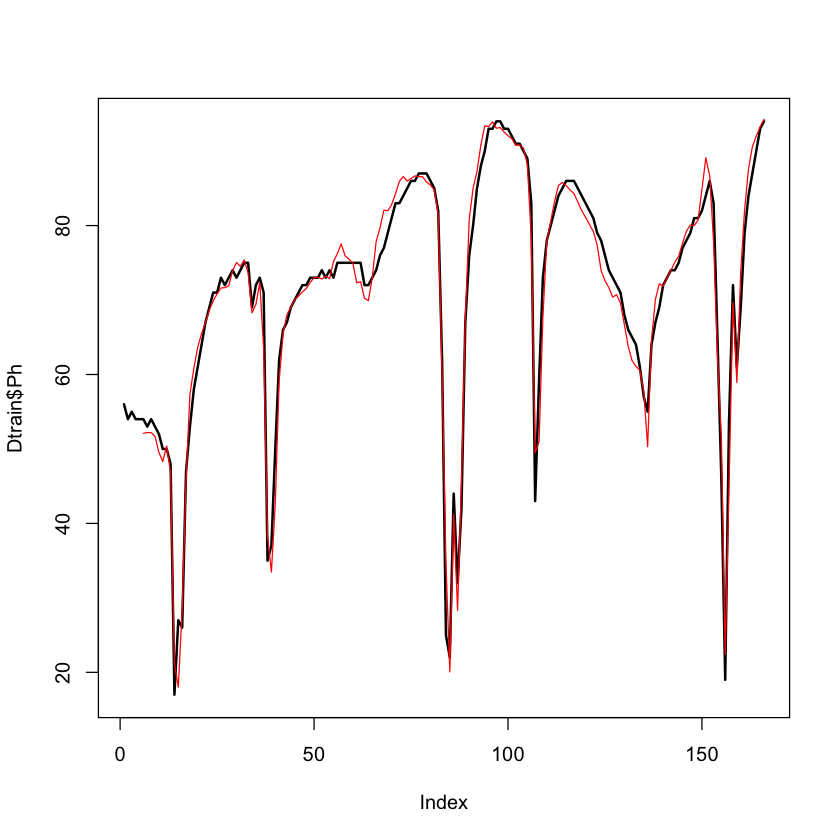

In [237]:
arx_onestep <- function(istart, fit, X) {
  # Get variable names
  nmout <- names(fit$model)[1]
  nmcoef <- names(fit$coefficients)
  
  # Get the max lag used for the output variable
  lagmax <- max(as.numeric(getse(strsplit(nmcoef[grep(nmout, nmcoef)], ".l"), 2)))
  nmoutcoef <- paste0(nmout, ".l", 1:lagmax)
  y <- rep(NA, nrow(X))
  
  for(i in (istart+1):nrow(X)) {
    newdata <- X[i, nmcoef]       
    newdata[, nmoutcoef] <- X[(i-1):(i-lagmax), nmout]  # actual lags from data
    y[i] <- predict(fit, newdata)
  }
  
  return(y)
}
par(bg = "white")
plot(Dtrain$Ph, type="l", lwd=2)  
X <- as.data.frame(Dtrain)
lines(arx_onestep(5, L[[1]], X),col = "red")


In [238]:
L$ARX2 <- lm(Ph ~ 0 + Ph.l1 + Ph.l2 + Tdelta.l0 + Tdelta.l1 + Gv.l0 + Gv.l1, data = Dtrain)

L$ARX3 <- lm(Ph ~ 0 + Ph.l1 + Ph.l2 + Ph.l3 + Tdelta.l0 + Tdelta.l1 + Tdelta.l2 + Gv.l0 + Gv.l1 + Gv.l2, data = Dtrain)

L$ARX4 <- lm(Ph ~ 0 + Ph.l1 + Ph.l2 + Ph.l3 + Ph.l4 + Tdelta.l0 + Tdelta.l1 + Tdelta.l2 + Tdelta.l3 + Gv.l0 + Gv.l1 + Gv.l2 + Gv.l3, data = Dtrain)

L$ARX5 <- lm(Ph ~ 0 + Ph.l1 + Ph.l2 + Ph.l3 + Ph.l4 + Ph.l5 + Tdelta.l0 + Tdelta.l1 + Tdelta.l2 + Tdelta.l3 + Tdelta.l4 + Gv.l0 + Gv.l1 + Gv.l2 + Gv.l3 + Gv.l4, data = Dtrain)

L$ARX6 <- lm(Ph ~ 0 + Ph.l1 + Ph.l2 + Ph.l3 + Ph.l4 + Ph.l5 + Ph.l6 + Tdelta.l0 + Tdelta.l1 + Tdelta.l2 + Tdelta.l3 + Tdelta.l4 + Tdelta.l5 + Gv.l0 + Gv.l1 + Gv.l2 + Gv.l3 + Gv.l4 + Gv.l5, data = Dtrain)

L$ARX7 <- lm(Ph ~ 0 + Ph.l1 + Ph.l2 + Ph.l3 + Ph.l4 + Ph.l5 + Ph.l6 + Ph.l7 + Tdelta.l0 + Tdelta.l1 + Tdelta.l2 + Tdelta.l3 + Tdelta.l4 + Tdelta.l5 + Tdelta.l6 + Gv.l0 + Gv.l1 + Gv.l2 + Gv.l3 + Gv.l4 + Gv.l5 + Gv.l6, data = Dtrain)

L$ARX8 <- lm(Ph ~ 0 + Ph.l1 + Ph.l2 + Ph.l3 + Ph.l4 + Ph.l5 + Ph.l6 + Ph.l7 + Ph.l8 + Tdelta.l0 + Tdelta.l1 + Tdelta.l2 + Tdelta.l3 + Tdelta.l4 + Tdelta.l5 + Tdelta.l6 + Tdelta.l7 + Gv.l0 + Gv.l1 + Gv.l2 + Gv.l3 + Gv.l4 + Gv.l5 + Gv.l6 + Gv.l7, data = Dtrain)

L$ARX9 <- lm(Ph ~ 0 + Ph.l1 + Ph.l2 + Ph.l3 + Ph.l4 + Ph.l5 + Ph.l6 + Ph.l7 + Ph.l8 + Ph.l9 + Tdelta.l0 + Tdelta.l1 + Tdelta.l2 + Tdelta.l3 + Tdelta.l4 + Tdelta.l5 + Tdelta.l6 + Tdelta.l7 + Tdelta.l8 + Gv.l0 + Gv.l1 + Gv.l2 + Gv.l3 + Gv.l4 + Gv.l5 + Gv.l6 + Gv.l7 + Gv.l8, data = Dtrain)

L$ARX10 <- lm(Ph ~ 0 + Ph.l1 + Ph.l2 + Ph.l3 + Ph.l4 + Ph.l5 + Ph.l6 + Ph.l7 + Ph.l8 + Ph.l9 + Ph.l10 + Tdelta.l0 + Tdelta.l1 + Tdelta.l2 + Tdelta.l3 + Tdelta.l4 + Tdelta.l5 + Tdelta.l6 + Tdelta.l7 + Tdelta.l8 + Tdelta.l9 + Gv.l0 + Gv.l1 + Gv.l2 + Gv.l3 + Gv.l4 + Gv.l5 + Gv.l6 + Gv.l7 + Gv.l8 + Gv.l9, data = Dtrain)

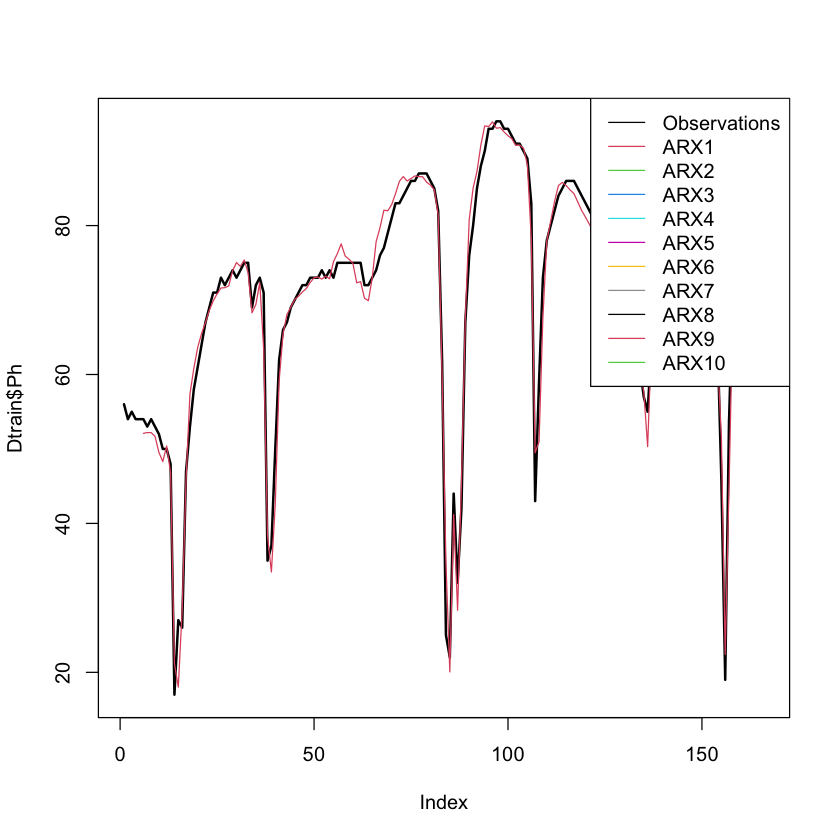

In [239]:
par(bg = "white")
plot(Dtrain$Ph, type="l", lwd=2)  
X <- as.data.frame(Dtrain)
for(i in 1:1){
  lines(arx_onestep(5, L[[i]], X), col=i+1)
}
legend("topright", c("Observations",names(L)), lty=1, col=1:(length(L)+1))

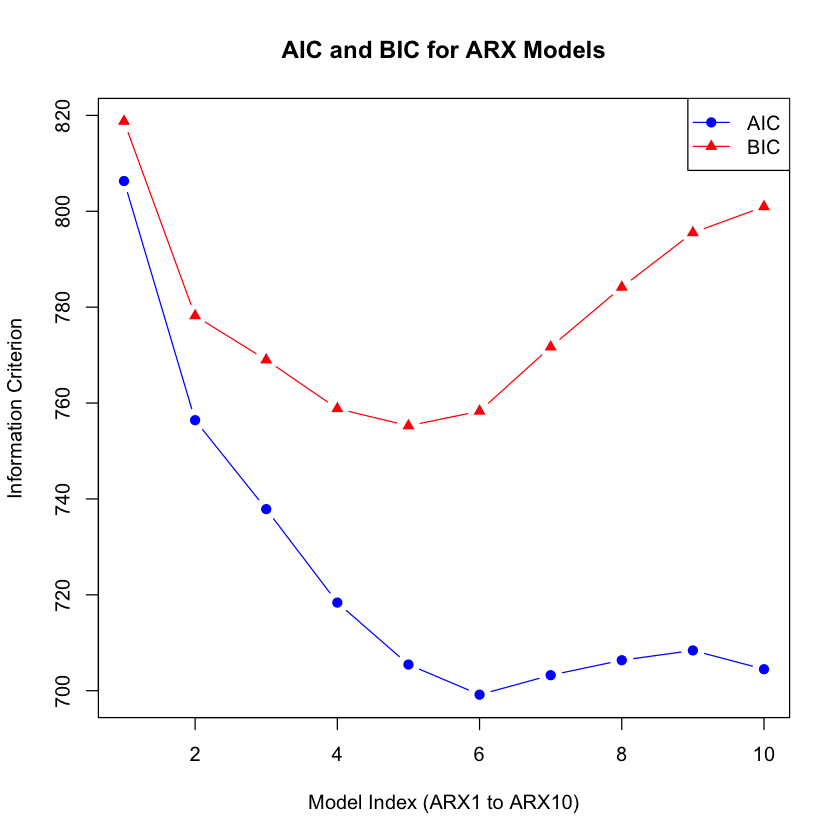

In [240]:
AIC_vec <- sapply(L[1:10], AIC)
BIC_vec <- sapply(L[1:10], BIC)
par(bg = "white")
plot(1:10, AIC_vec, type = "b", pch = 19, col = "blue", ylim = range(c(AIC_vec, BIC_vec)),
     xlab = "Model Index (ARX1 to ARX10)", ylab = "Information Criterion",
     main = "AIC and BIC for ARX Models")
lines(1:10, BIC_vec, type = "b", pch = 17, col = "red")
legend("topright", legend = c("AIC", "BIC"), col = c("blue", "red"), pch = c(19, 17), lty = 1)


## 3.8


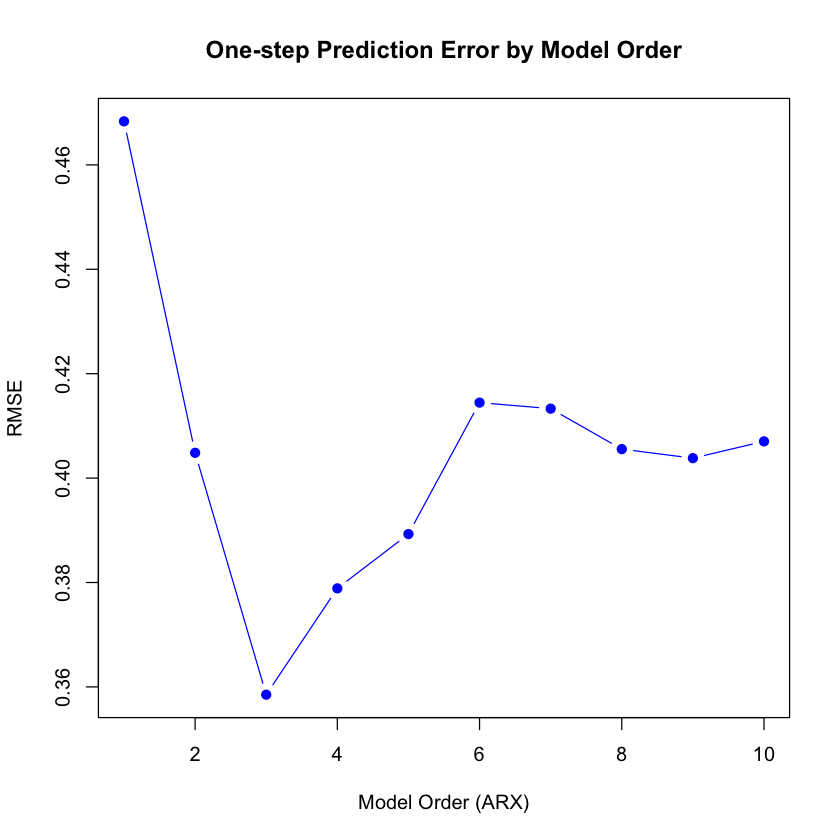

In [241]:
Error <- rep(0,10)
X <- as.data.frame(Dtest)
for(i in 1:10){
  Error[i] <- 1/64*sqrt(sum((Dtest$Ph-arx_onestep(i+1, L[[i]],X))^2,na.rm = TRUE))
}
par(bg="white")
plot(1:10, Error, type = "b", pch = 19, col = "blue",
     xlab = "Model Order (ARX)", ylab = "RMSE",
     main = "One-step Prediction Error by Model Order")


[1] 56 54 55